In [27]:
import sys 
sys.path.append("../")
import pandas as pd 
import numpy as np 
import os 
import misc
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
frame = pd.read_csv("../dataset/LC_NSCLC_12_folders_20210203.csv", converters={"gender":misc.gender_convert})
frame.head(5)

,PatientID,gender,age,Survival.time,Mcode,Mcode.description,Histology,Overall.stage,Clinical.T.Stage,Clinical.N.stage,Clinical.M.stage,Smoking.status,Smoking.amount,Deadstatus.event
0,LC00008,0.0,67.460274,1745,NaN,Squamous cell carcinoma,squamous cell carcinoma,2B,2,1,0,1,50.0,1
1,LC00009,0.0,78.139726,74,m8070/3,Squamous cell carcinoma,squamous cell carcinoma,3A,3,2,0,1,50.0,1
2,LC00012,0.0,64.032877,330,m8140/3,Adenocarcinoma,adenocarcinoma,3B,3,3,1,1,40.0,1
3,LC00013,0.0,69.904110,411,m8070/3,Squamous cell carcinoma,squamous cell carcinoma,3A,1,2,0,0,0.0,1
4,LC00021,0.0,65.367123,29,m8140/3,Adenocarcinoma,adenocarcinoma,4,4,3,1,1,30.0,1


In [16]:
len(frame)

4110

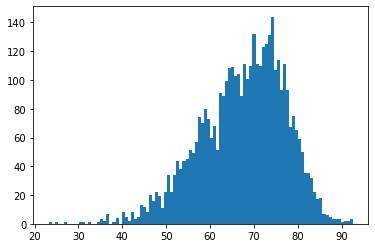

In [4]:
age = np.array(frame.age)
plt.hist(age, bins=100)
plt.show()


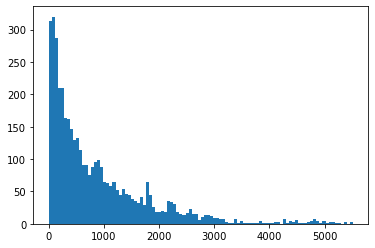

873.4917274939173

In [5]:
sur_time = np.array(frame["Survival.time"])
plt.hist(sur_time, bins=100)
plt.show()
sur_time.mean()

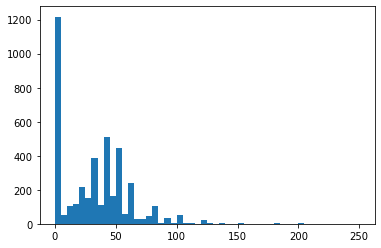

In [6]:
smoking = np.array(frame["Smoking.amount"])
plt.hist(smoking, bins=50)
plt.show()


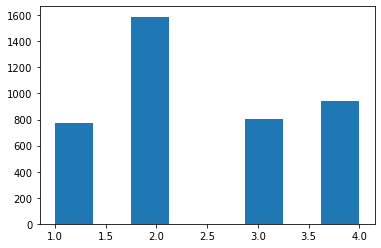

In [7]:
Tstage = np.array(frame["Clinical.T.Stage"])
plt.hist(Tstage, bins=8)
plt.show()


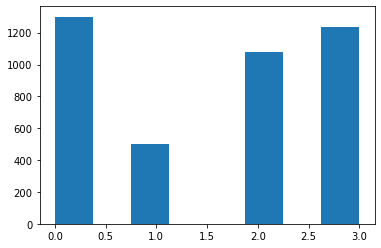

In [8]:
Nstage = np.array(frame["Clinical.N.stage"])
plt.hist(Nstage, bins=8)
plt.show()


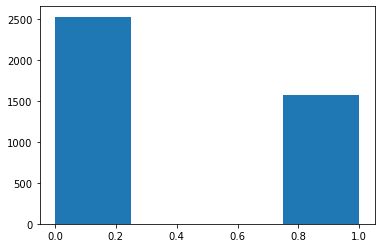

In [9]:
Mstage = np.array(frame["Clinical.M.stage"])
plt.hist(Mstage, bins=4)
plt.show()

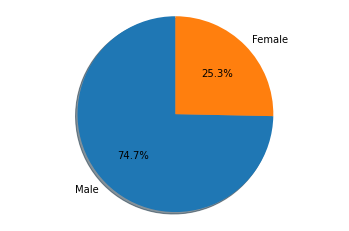

In [10]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [2011, 682]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

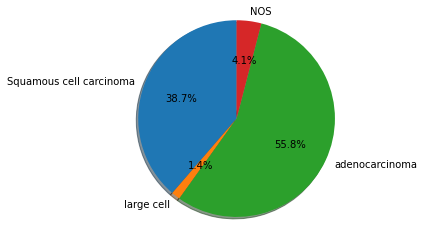

In [11]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Squamous cell carcinoma', 'large cell', 'adenocarcinoma', 'NOS'
sizes = [1040, 39, 1502, 109]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

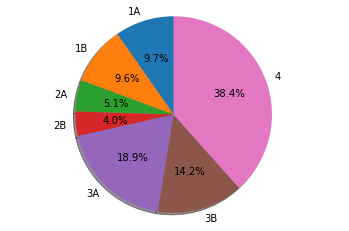

In [17]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1A', '1B', '2A', '2B', '3A', '3B', '4'
sizes = [ 400, 396, 211, 166, 775, 583, 1579]
explode = (0, 0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
frame = pd.read_csv("../dataset/Lung1.clinical.csv")
frame.head(5)

,PatientID,age,cl1n1cal.T.Stage,Cl1n1cal.N.Stage,Cl1n1cal.M.Stage,Overall.Stage,H1stology,gender,week,censoring
0,LUNG1-001,78.7515,2,3,0,4,3,1,309.285714,1
1,LUNG1-002,83.8001,2,0,0,1,5,1,22.142857,1
2,LUNG1-003,68.1807,2,3,0,4,3,1,36.571429,1
3,LUNG1-004,70.8802,2,1,0,2,6,1,20.142857,1
4,LUNG1-005,80.4819,4,2,0,4,6,1,50.428571,1


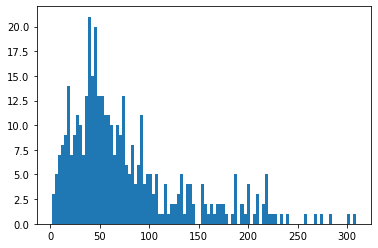

(76.6617857156425, 400)

In [29]:
week = np.array(frame["week"])
plt.hist(week, bins=100)
plt.show()
week.mean(), len(week)

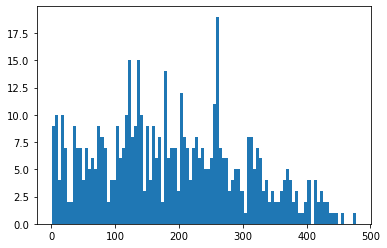

188.6262303804203


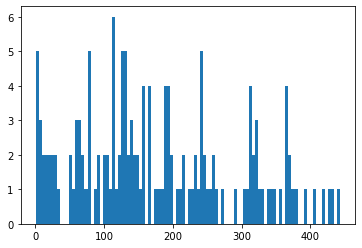

177.40540540540542


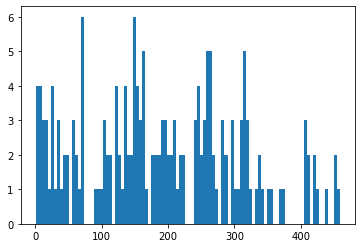

189.94040816326535


In [8]:
df_train = pd.read_csv("../dataset/train.csv")

index_list = []
path_CT = "../dataset/total_12_folders/CT"
for i, patientID in enumerate(df_train["PatientID"]):
    if (patientID + ".npy" not in os.listdir(path_CT)) or (df_train.iloc[i]["Overall.stage"] > 2) : # ignore latter stage or (OverallStage[i] > 2)
        index_list.append(i)
df_train = df_train.drop(index_list)

sur_time = np.array(df_train["Survival.time"])
plt.hist(sur_time, bins=100)
plt.show()
print(sur_time.mean())

df_train = pd.read_csv("../dataset/val.csv")

index_list = []
path_CT = "../dataset/total_12_folders/CT"
for i, patientID in enumerate(df_train["PatientID"]):
    if (patientID + ".npy" not in os.listdir(path_CT)) or (df_train.iloc[i]["Overall.stage"] > 2) : # ignore latter stage or (OverallStage[i] > 2)
        index_list.append(i)
df_train = df_train.drop(index_list)

sur_time = np.array(df_train["Survival.time"])
plt.hist(sur_time, bins=100)
plt.show()
print(sur_time.mean())

df_train = pd.read_csv("../dataset/test.csv")

index_list = []
path_CT = "../dataset/total_12_folders/CT"
for i, patientID in enumerate(df_train["PatientID"]):
    if (patientID + ".npy" not in os.listdir(path_CT)) or (df_train.iloc[i]["Overall.stage"] > 2) : # ignore latter stage or (OverallStage[i] > 2)
        index_list.append(i)
df_train = df_train.drop(index_list)

sur_time = np.array(df_train["Survival.time"])
plt.hist(sur_time, bins=100)
plt.show()
print(sur_time.mean())

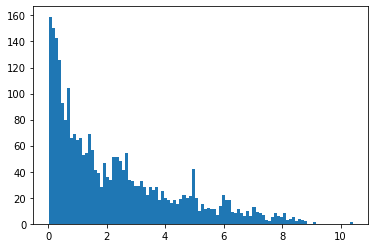

2.2430176662987247

In [77]:
sur_time = np.array(frame["Survival.time"])
sur_time = sur_time / 365
plt.hist(sur_time, bins=100)
plt.show()
sur_time.mean()

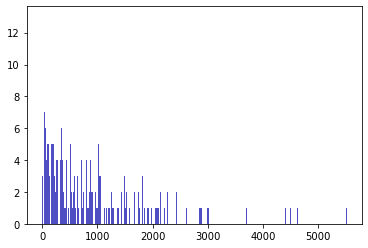

In [13]:


plt.hist(x=sur_time, bins=np.arange(sur_time.max()+1), color='#0504aa',alpha=0.7, rwidth=0.85)
objective_prob, bin_edges = np.histogram(sur_time, bins=np.arange(sur_time.max()+1), density=True)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

In [14]:
objective_prob.shape, objective_prob.shape


((5514,), (5514,))

ValueError: The number of FixedLocator locations (5514), usually from a call to set_ticks, does not match the number of ticklabels (11).

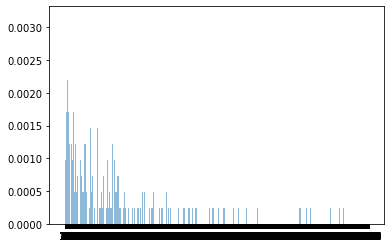

In [15]:
objects = ('1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11')
y_pos = np.arange(sur_time.max())

plt.bar(y_pos, objective_prob, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('PDF')
plt.xlabel('Time (year)')
#plt.title('')

plt.show()

In [56]:
pdf.max()

0.38061641292239135